In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("HR_comma_sep.csv")
data.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

<AxesSubplot:>

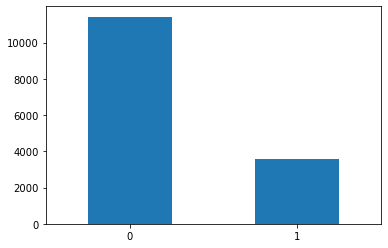

In [11]:
left = pd.value_counts(data["left"])
left.plot(kind = "bar",rot = 0)

In [13]:
#average number of all column
data.groupby(by = "left").mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<AxesSubplot:xlabel='salary'>

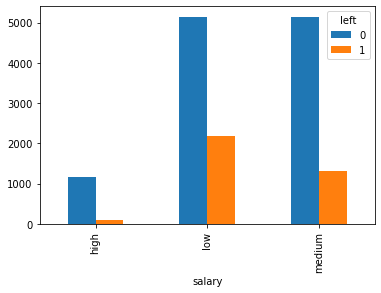

In [15]:
# Impact of salary on employee retention
pd.crosstab(data["salary"],data["left"]).plot(kind = "bar")

<Figure size 1440x720 with 0 Axes>

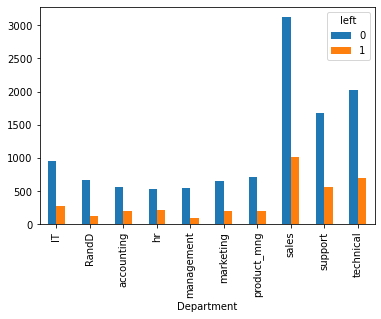

In [19]:
#Department wise employee retention rate
pd.crosstab(data["Department"],data["left"]).plot(kind = "bar")
plt.show()

##### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level** 

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [20]:
df = data[["satisfaction_level","average_montly_hours","promotion_last_5years", "salary"]]
df

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                    0.38                   157                      0     low
1                    0.80                   262                      0  medium
2                    0.11                   272                      0  medium
3                    0.72                   223                      0     low
4                    0.37                   159                      0     low
...                   ...                   ...                    ...     ...
14994                0.40                   151                      0     low
14995                0.37                   160                      0     low
14996                0.37                   143                      0     low
14997                0.11                   280                      0     low
14998                0.37                   158                      0     low

[14999 rows x 4 columns]

In [21]:
dummies = pd.get_dummies(df["salary"])
dummies

high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

In [22]:
merge = pd.concat([df,dummies],axis= 1)
merge

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary  high  low  medium  
0         low     0    1       0  
1      medium     0    0       1  
2      medium     0    0       1  
3         low     0    1       0  
4         low     0    1       0  
...       ...   ...  ...     ...  
14994     low     0    1       0  
14995     low     0    1       0  
14996     low     0    1       0  
14997     low     0    1       0  
14998     low     0    1       0  

[14999 rows x 7 columns]

In [23]:
merge.drop("salary",axis = 1,inplace = True)

In [24]:
X = merge
X

satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.38                   157                      0     0   
1                    0.80                   262                      0     0   
2                    0.11                   272                      0     0   
3                    0.72                   223                      0     0   
4                    0.37                   159                      0     0   
...                   ...                   ...                    ...   ...   
14994                0.40                   151                      0     0   
14995                0.37                   160                      0     0   
14996                0.37                   143                      0     0   
14997                0.11                   280                      0     0   
14998                0.37                   158                      0     0   

       low  medium  
0        1       0  
1        0       1  
2        0       1  
3        1       0  
4        1       0  
...    ...     ...  
14994    1       0  
14995    1       0  
14996    1       0  
14997    1       0  
14998    1       0  

[14999 rows x 6 columns]

In [25]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
#accuracy of the model
lr.score(X_test, y_test)

0.7811111111111111

In [30]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)